# Mchezopesa Ltd football analysis and prediction

## Definition of the Question

### we have been presented with data from fifa world rankings and international matches:
### Our goal is to be able to predict the following given the data:
###        i) To predict the result of a match between team 1 and team 2 
###        ii)  To predict the number of goals scored for the away team 
###        iii) To predict the number of goals scored for the home team 
###        iv) To predict whether,from the home team's perspective the game was a win,loss or draw

## Metric of success
### The metric for success includes:
### i) creating a model with a low RSME(Root Mean Squared) score
### ii) Being able to accurately predict the scores of atleast 75% of the matches


*************************************************************************************************

### Previewing the datasets

In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
fifa = pd.read_csv('fifa_ranking.csv')
fifa.head()

rank country_full country_abrv  total_points  previous_points  rank_change  \
0     1      Germany          GER           0.0               57            0   
1     2        Italy          ITA           0.0               57            0   
2     3  Switzerland          SUI           0.0               50            9   
3     4       Sweden          SWE           0.0               55            0   
4     5    Argentina          ARG           0.0               51            5   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   
2           0.0                    0.0            0.0                     0.0   
3           0.0                    0.0            0.0                     0.0   
4           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               0.0                    0.0                 0.0   
3               0.0                    0.0                 0.0   
4               0.0                    0.0                 0.0   

   three_year_ago_weighted confederation   rank_date  
0                      0.0          UEFA  1993-08-08  
1                      0.0          UEFA  1993-08-08  
2                      0.0          UEFA  1993-08-08  
3                      0.0          UEFA  1993-08-08  
4                      0.0      CONMEBOL  1993-08-08

#### The first dataset appears to show the fifa rankings for the different teams from 1993 to 2019 the most recent iteration of the rankings

In [3]:
results = pd.read_csv('results.csv')
results.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [4]:
results.tail()

date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True

#### The second dataset is a list of matches played by the international teams from 1872 to 2019 and includes whether the teams were home or away,the scores for both away and home teams and the tournament type

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [7]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [8]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

#### Looking at the datatypes of the columns I can note that one specicfic column of interest in both datasets appears to have the wrong datatype(the 'date' and 'rank_date' column),we will have to change that during cleaning to allow us to use that column to select the right dates

In [9]:
fifa.describe()

rank  total_points  previous_points   rank_change  \
count  57793.000000  57793.000000     57793.000000  57793.000000   
mean     101.628086    122.068637       332.302926     -0.009897   
std       58.618424    260.426863       302.872948      5.804309   
min        1.000000      0.000000         0.000000    -72.000000   
25%       51.000000      0.000000        56.000000     -2.000000   
50%      101.000000      0.000000       272.000000      0.000000   
75%      152.000000     92.790000       525.000000      1.000000   
max      209.000000   1775.030000      1920.000000     92.000000   

       cur_year_avg  cur_year_avg_weighted  last_year_avg  \
count  57793.000000           57793.000000   57793.000000   
mean      61.798602              61.798602      61.004602   
std      138.014883             138.014883     137.688204   
min        0.000000               0.000000       0.000000   
25%        0.000000               0.000000       0.000000   
50%        0.000000               0.000000       0.000000   
75%       32.250000              32.250000      26.660000   
max     1158.660000            1158.660000    1169.570000   

       last_year_avg_weighted  two_year_ago_avg  two_year_ago_weighted  \
count            57793.000000      57793.000000           57793.000000   
mean                30.502377         59.777462              17.933277   
std                 68.844143        136.296079              40.888849   
min                  0.000000          0.000000               0.000000   
25%                  0.000000          0.000000               0.000000   
50%                  0.000000          0.000000               0.000000   
75%                 13.330000         21.500000               6.450000   
max                584.790000       1159.710000             347.910000   

       three_year_ago_avg  three_year_ago_weighted  
count        57793.000000             57793.000000  
mean            59.173916                11.834811  
std            135.533343                27.106675  
min              0.000000                 0.000000  
25%              0.000000                 0.000000  
50%              0.000000                 0.000000  
75%             21.250000                 4.250000  
max           1200.770000               240.150000

In [10]:
results.describe()

home_score    away_score
count  40839.000000  40839.000000
mean       1.745709      1.188105
std        1.749145      1.405120
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

In [11]:
fifa.shape

(57793, 16)

In [12]:
results.shape

(40839, 9)

In [13]:
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [14]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [15]:
results.duplicated().sum()

0

In [16]:
fifa.duplicated().sum()

37

#### Both datasets appear to have zero null values,the fifa dataset appears to have some duplicated rows that we will take of during cleaning

#### I will now run pandas profiling on both the datasets to generate an indepth report that will guide me through data cleaning 

In [17]:
pandas_profiling.ProfileReport(fifa)

In [18]:
pandas_profiling.ProfileReport(results)

## Data Cleaning

### first let's drop all the duplicated rows in the fifa dataset

In [19]:
fifa = fifa.drop_duplicates()

In [20]:
#validating that the outliers were dropped
fifa.duplicated().sum()

0

### Next lets check to see if our datasets have any outliers  

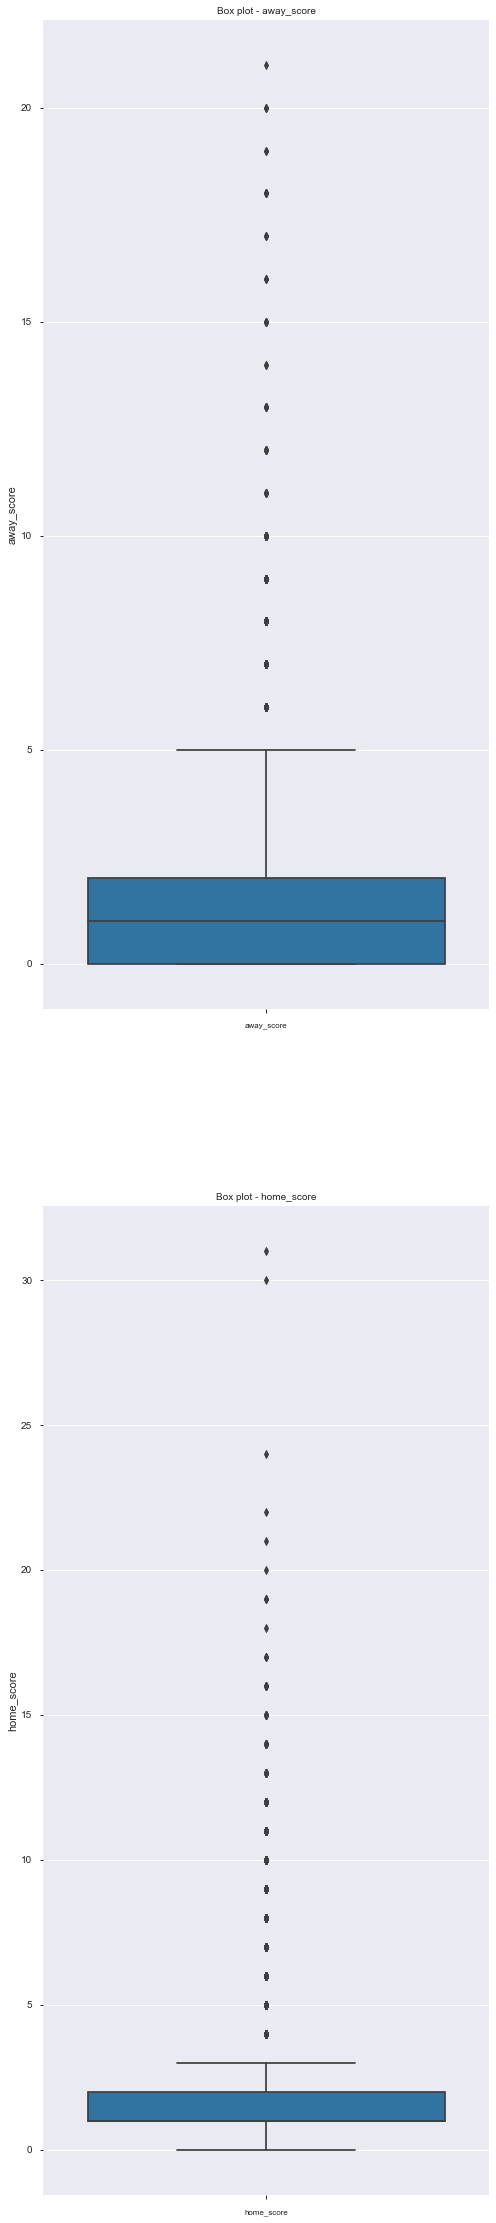

In [21]:
columns=['away_score','home_score']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=results[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

In [22]:
q1=results.quantile(0.25)
q3=results.quantile(0.75)
iqr=q3-q1
resultsout = results[~((results < (q1 - 1.5 * iqr)) | (results> (q3 + 1.5 * iqr))).any(axis=1)]

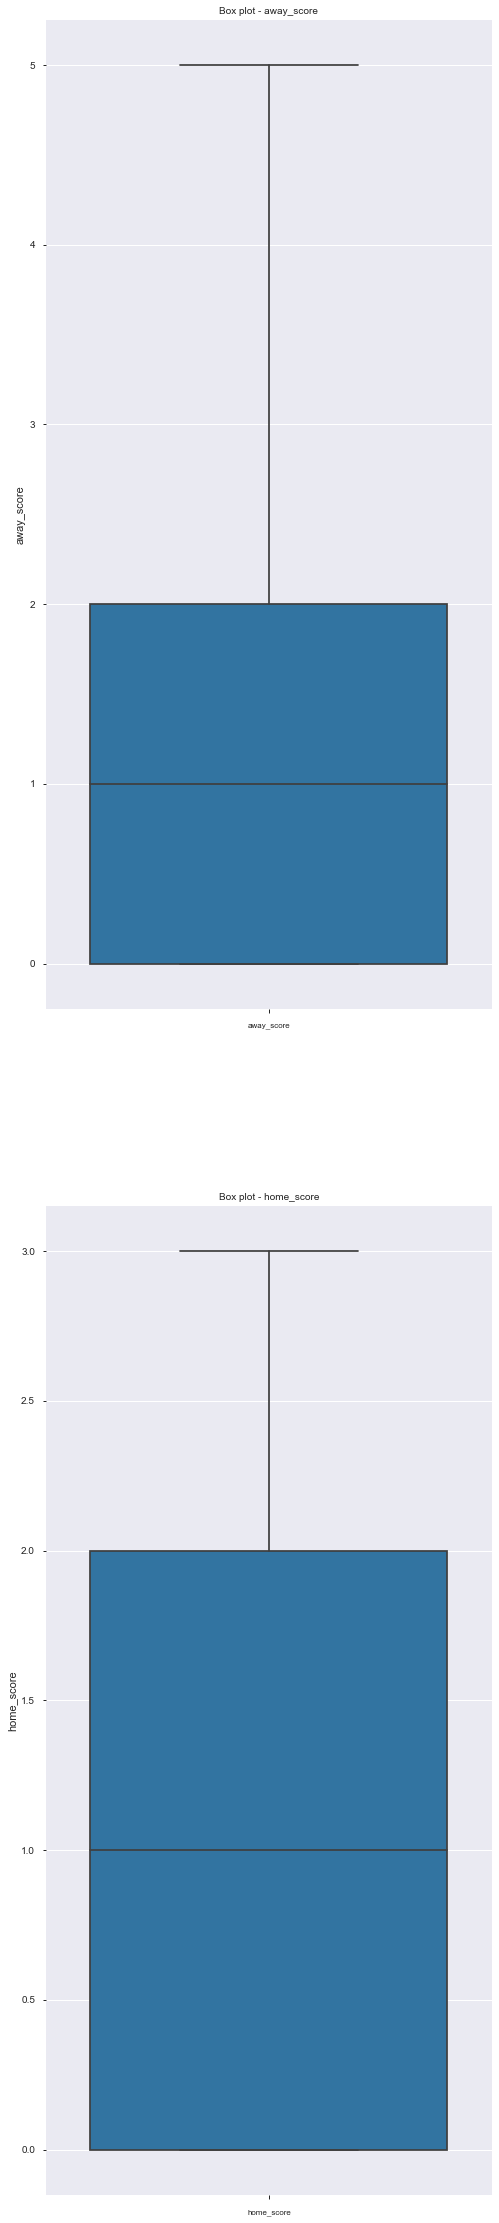

In [23]:
columns=['away_score','home_score']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=resultsout[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.xticks(rotation=90)
plt.show()

#### In the above I have plotted the outliers using a boxplot and noted that the away and homescore columns of the results dataset both have outliers that might affect the prediction outcome.
#### I proceeded to remove the outliers using the IQR method and created a new dataframe called resultsout
#### I then proceeded to plot out results out to make sure the outliers were dropped

#### Now for the fifa dataset we will check for the ouliers but will not proceed to remove them as this would affect the overall outcome of the prediction
#### More simply removing some values from the fifa rankings dataset might mean that some countries might not have ranks for certain years meaning you cannot map them to the results dataset once its time to predict based on the problem statement's criteria

In [24]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

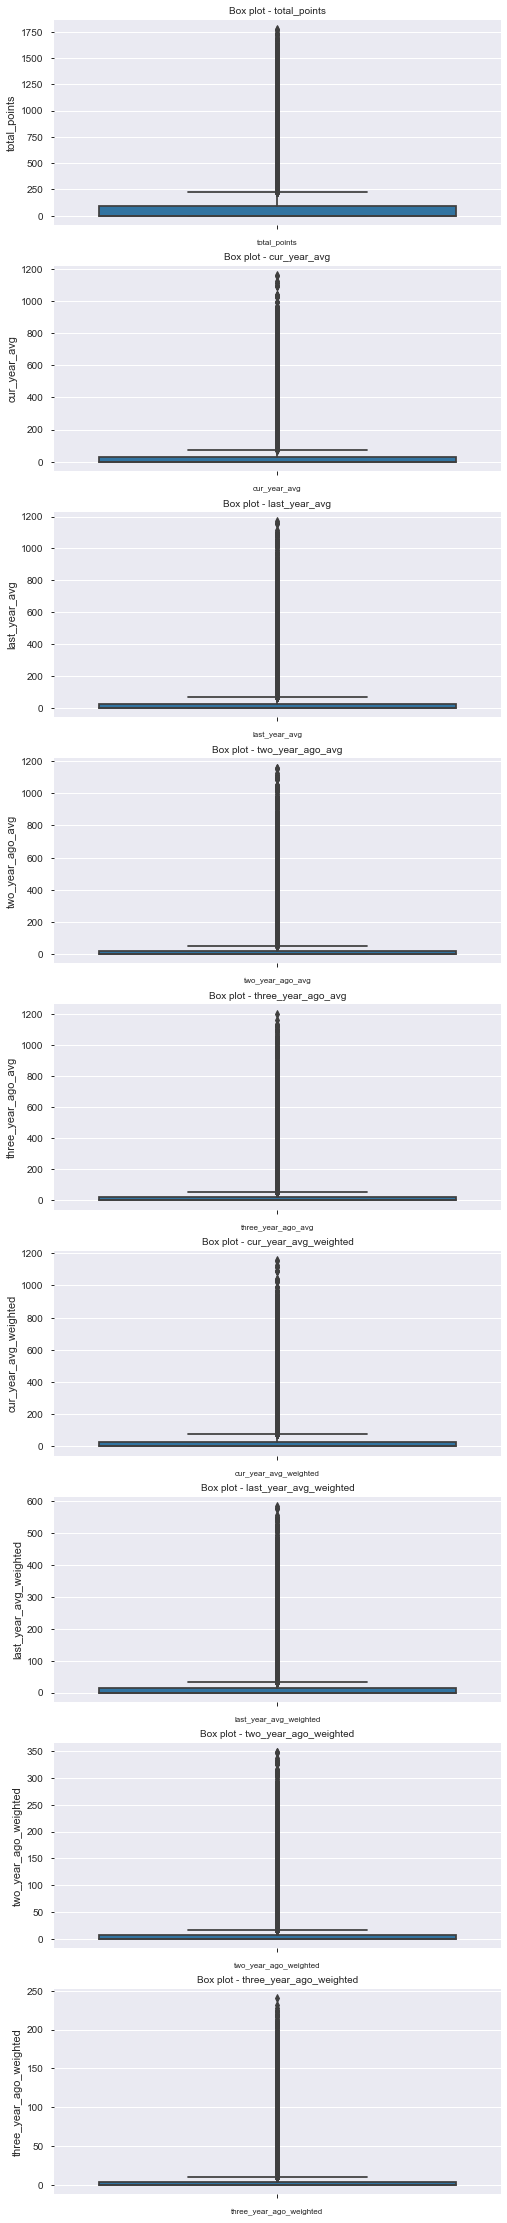

In [25]:
columns=['total_points','cur_year_avg','last_year_avg','two_year_ago_avg','three_year_ago_avg','cur_year_avg_weighted','last_year_avg_weighted','two_year_ago_weighted','three_year_ago_weighted']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=fifa[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

#### I have noted the outliers but will leave them as such since majority of the analysis will be occuring on the results dataset

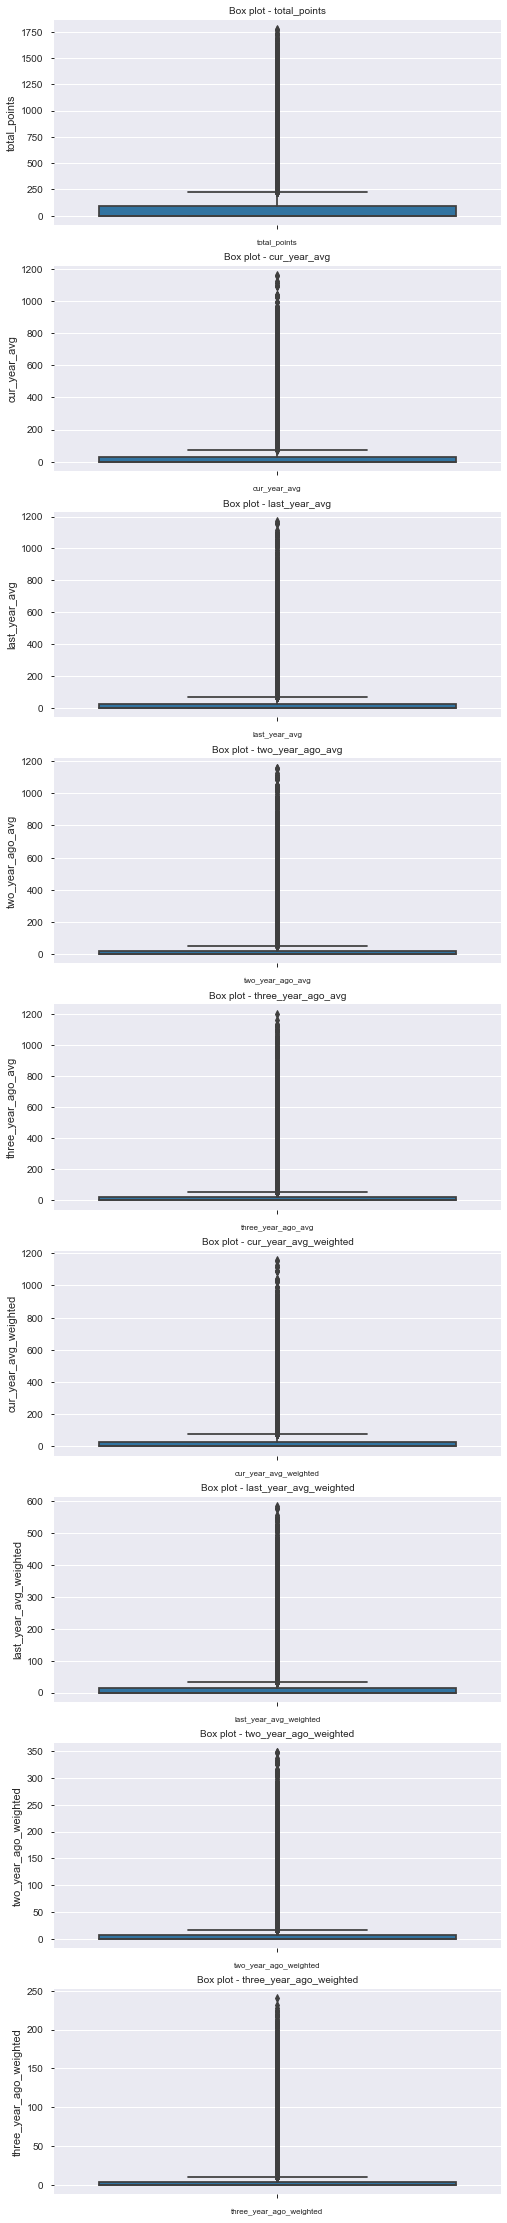

In [26]:
columns=['total_points','cur_year_avg','last_year_avg','two_year_ago_avg','three_year_ago_avg','cur_year_avg_weighted','last_year_avg_weighted','two_year_ago_weighted','three_year_ago_weighted']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=fifa[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

In [27]:
print('The shape of the results dataset with outliers is ' + str(results.shape))
print('The shape of the results dataset without outliers is ' + str(resultsout.shape))

The shape of the results dataset with outliers is (40839, 9)
The shape of the results dataset without outliers is (26433, 9)


#### As can be seen by checking the shapes of the dataframes with and without the outliers,most of the outliers have been taken care of

## EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [28]:
fifa.head()

rank country_full country_abrv  total_points  previous_points  rank_change  \
0     1      Germany          GER           0.0               57            0   
1     2        Italy          ITA           0.0               57            0   
2     3  Switzerland          SUI           0.0               50            9   
3     4       Sweden          SWE           0.0               55            0   
4     5    Argentina          ARG           0.0               51            5   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   
2           0.0                    0.0            0.0                     0.0   
3           0.0                    0.0            0.0                     0.0   
4           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               0.0                    0.0                 0.0   
3               0.0                    0.0                 0.0   
4               0.0                    0.0                 0.0   

   three_year_ago_weighted confederation   rank_date  
0                      0.0          UEFA  1993-08-08  
1                      0.0          UEFA  1993-08-08  
2                      0.0          UEFA  1993-08-08  
3                      0.0          UEFA  1993-08-08  
4                      0.0      CONMEBOL  1993-08-08

In [29]:
resultsout.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
6  1877-03-03   England  Scotland           1           3   Friendly   London   

    country  neutral  
0  Scotland    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
6   England    False

#### Below are the first 50 home teams in the results dataset grouped by country and total number of home goals

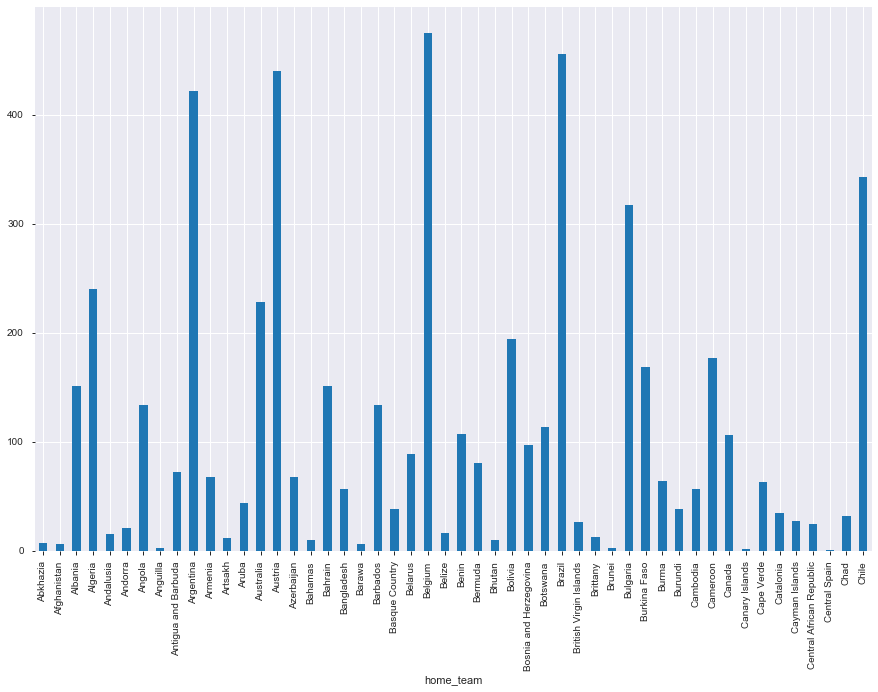

In [30]:
plt.figure(figsize=(15,10))
resultsout.groupby('home_team')['home_score'].sum()[:50].plot.bar()

#### Below is the same bargraph as the one on top except for the first 50 away teams in the results dataset grouped by country and total number of away goals

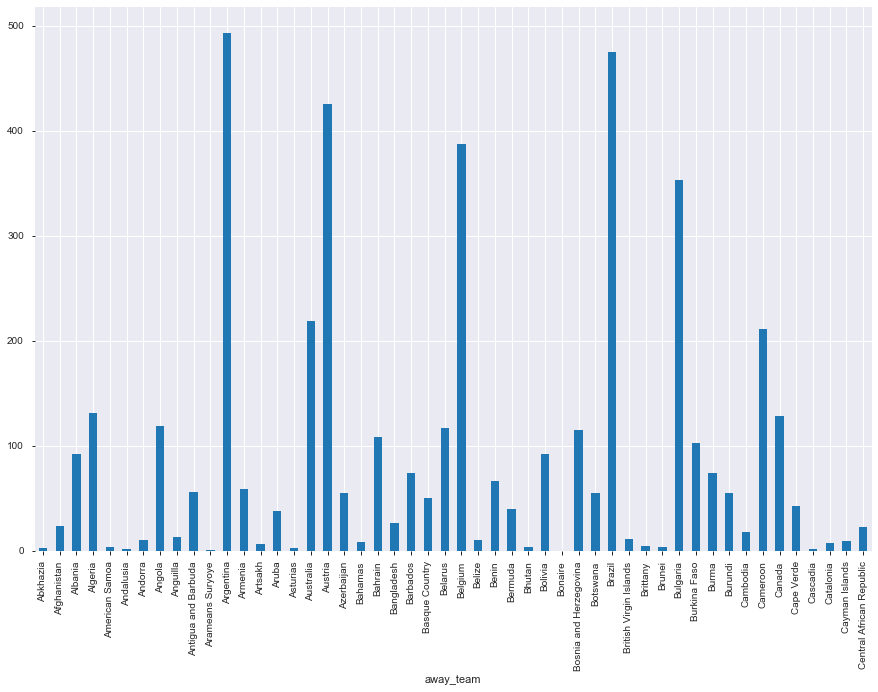

In [31]:
plt.figure(figsize=(15,10))
resultsout.groupby('away_team')['away_score'].sum()[:50].plot.bar()

#### Below is a plot of the home and away teams arranged by frequency 

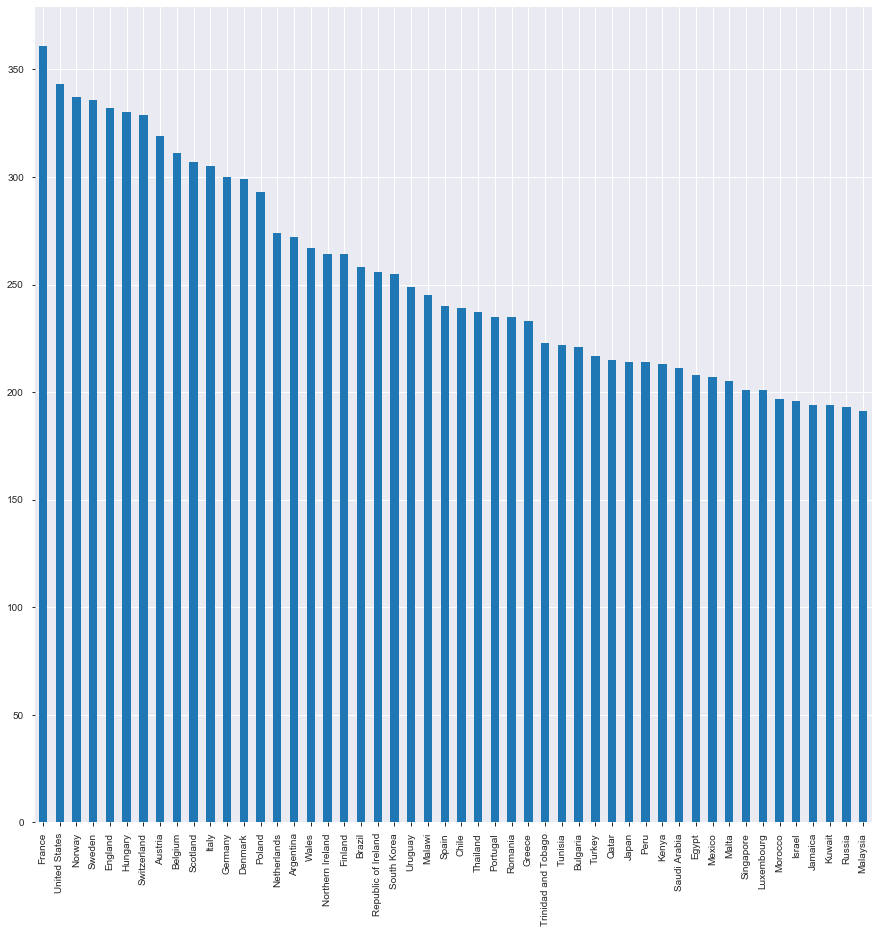

In [32]:
#plot of home teams arranged by frequency
plt.figure(figsize=(15,15))
resultsout['home_team'].value_counts()[:50].plot.bar()

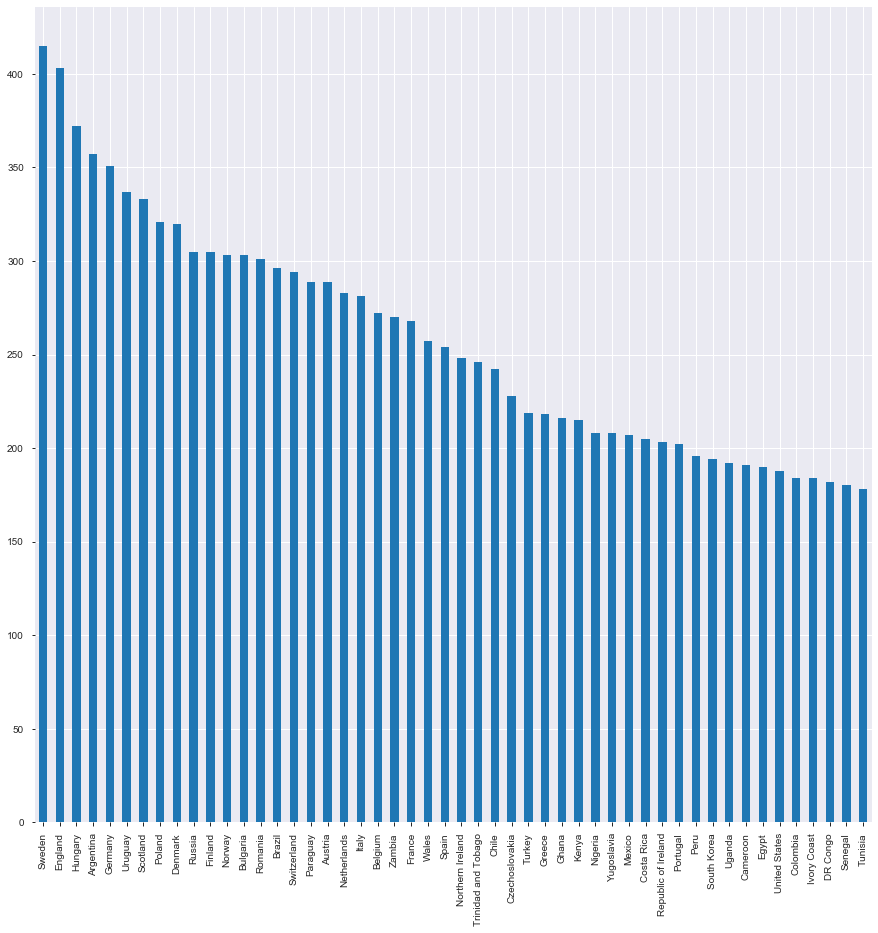

In [33]:
#plot of away teams arranged by frequency
plt.figure(figsize=(15,15))
resultsout['away_team'].value_counts()[:50].plot.bar()

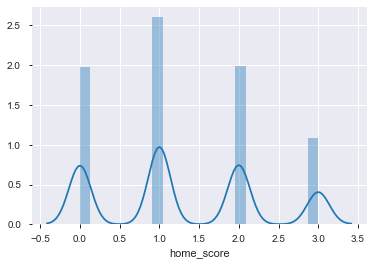

In [34]:
sns.distplot(resultsout['home_score'])

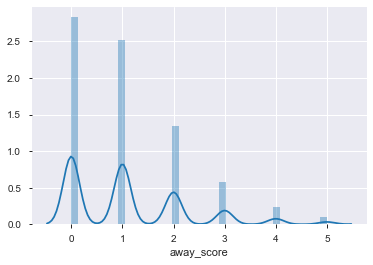

In [35]:
sns.distplot(resultsout['away_score'])

#### Above I can see that most away scores are skewed torwards zero while home scores seem to follow a normal distribution

## FEATURE ENGINEERING

## Implementing The solution

### Inorder for us to be able to accomplish the task we must:
####   i)First do feature engineering by selecting the variables we will work with 
####  ii)conduct a test for multicollinearity
#### iii) build and test a model to predict the outcomes

In [36]:
resultsout.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
6  1877-03-03   England  Scotland           1           3   Friendly   London   

    country  neutral  
0  Scotland    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
6   England    False

In [37]:
fifa.head()

rank country_full country_abrv  total_points  previous_points  rank_change  \
0     1      Germany          GER           0.0               57            0   
1     2        Italy          ITA           0.0               57            0   
2     3  Switzerland          SUI           0.0               50            9   
3     4       Sweden          SWE           0.0               55            0   
4     5    Argentina          ARG           0.0               51            5   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   
2           0.0                    0.0            0.0                     0.0   
3           0.0                    0.0            0.0                     0.0   
4           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               0.0                    0.0                 0.0   
3               0.0                    0.0                 0.0   
4               0.0                    0.0                 0.0   

   three_year_ago_weighted confederation   rank_date  
0                      0.0          UEFA  1993-08-08  
1                      0.0          UEFA  1993-08-08  
2                      0.0          UEFA  1993-08-08  
3                      0.0          UEFA  1993-08-08  
4                      0.0      CONMEBOL  1993-08-08

####  first of all we'll need to create a new dataframe with the features that we will require,but their is a slight problem with the dataset.
#### The results dataset contains matches from 1872 while the fifa rankings only begin in 1993.We'll first need to select the records from 1993 in the results dataset and do away with the other records before that

#### first to change the date column to datetime to make it easier to remove all data before 1993

In [38]:
resultsout['date'] = pd.to_datetime(resultsout['date'])

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
resultsout.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

#### now to split the date column into year,month and day to help us create the new dataframe
#### we will also do the same to the fifa dataset

In [40]:
resultsafter = resultsout[resultsout['date'] > '1993-01-01']
resultsafter.head()

date home_team     away_team  home_score  away_score  \
17362 1993-01-02     Gabon  Burkina Faso           1           1   
17363 1993-01-02    Kuwait       Lebanon           2           0   
17365 1993-01-03     Gabon         Ghana           2           3   
17366 1993-01-08    Uganda      Tanzania           3           1   
17368 1993-01-10    Angola      Zimbabwe           1           1   

                         tournament         city country  neutral  
17362                      Friendly   Libreville   Gabon    False  
17363                      Friendly  Kuwait City  Kuwait    False  
17365                      Friendly   Libreville   Gabon    False  
17366                      Friendly      Kampala  Uganda    False  
17368  FIFA World Cup qualification       Luanda  Angola    False

In [41]:
resultsafter[['year','month','day']] = resultsafter['date'].astype(str).str.split('-', expand=True).astype(int)

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
resultsafter.head()

date home_team     away_team  home_score  away_score  \
17362 1993-01-02     Gabon  Burkina Faso           1           1   
17363 1993-01-02    Kuwait       Lebanon           2           0   
17365 1993-01-03     Gabon         Ghana           2           3   
17366 1993-01-08    Uganda      Tanzania           3           1   
17368 1993-01-10    Angola      Zimbabwe           1           1   

                         tournament         city country  neutral  year  \
17362                      Friendly   Libreville   Gabon    False  1993   
17363                      Friendly  Kuwait City  Kuwait    False  1993   
17365                      Friendly   Libreville   Gabon    False  1993   
17366                      Friendly      Kampala  Uganda    False  1993   
17368  FIFA World Cup qualification       Luanda  Angola    False  1993   

       month  day  
17362      1    2  
17363      1    2  
17365      1    3  
17366      1    8  
17368      1   10

In [43]:
fifa[['year','month','day']] = fifa['rank_date'].astype(str).str.split('-',expand=True).astype(int)
fifa.head()

rank country_full country_abrv  total_points  previous_points  rank_change  \
0     1      Germany          GER           0.0               57            0   
1     2        Italy          ITA           0.0               57            0   
2     3  Switzerland          SUI           0.0               50            9   
3     4       Sweden          SWE           0.0               55            0   
4     5    Argentina          ARG           0.0               51            5   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   
2           0.0                    0.0            0.0                     0.0   
3           0.0                    0.0            0.0                     0.0   
4           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   
2               0.0                    0.0                 0.0   
3               0.0                    0.0                 0.0   
4               0.0                    0.0                 0.0   

   three_year_ago_weighted confederation   rank_date  year  month  day  
0                      0.0          UEFA  1993-08-08  1993      8    8  
1                      0.0          UEFA  1993-08-08  1993      8    8  
2                      0.0          UEFA  1993-08-08  1993      8    8  
3                      0.0          UEFA  1993-08-08  1993      8    8  
4                      0.0      CONMEBOL  1993-08-08  1993      8    8

#### Now to drop the unnecessery colmns and create the dataframe we will use

In [44]:
fifacleaned = fifa.drop(['country_abrv','total_points','previous_points','rank_change','cur_year_avg','confederation','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','day'],axis=1)

In [45]:
fifacleaned

rank country_full   rank_date  year  month
0         1      Germany  1993-08-08  1993      8
1         2        Italy  1993-08-08  1993      8
2         3  Switzerland  1993-08-08  1993      8
3         4       Sweden  1993-08-08  1993      8
4         5    Argentina  1993-08-08  1993      8
...     ...          ...         ...   ...    ...
57788   206     Anguilla  2018-06-07  2018      6
57789   206      Bahamas  2018-06-07  2018      6
57790   206      Eritrea  2018-06-07  2018      6
57791   206      Somalia  2018-06-07  2018      6
57792   206        Tonga  2018-06-07  2018      6

[57756 rows x 5 columns]

In [46]:
resultscleaned = resultsafter.drop(['city','country','neutral','day'],axis=1)
resultscleaned

date      home_team     away_team  home_score  away_score  \
17362 1993-01-02          Gabon  Burkina Faso           1           1   
17363 1993-01-02         Kuwait       Lebanon           2           0   
17365 1993-01-03          Gabon         Ghana           2           3   
17366 1993-01-08         Uganda      Tanzania           3           1   
17368 1993-01-10         Angola      Zimbabwe           1           1   
...          ...            ...           ...         ...         ...   
40799 2019-07-07  United States        Mexico           0           1   
40800 2019-07-07          India    Tajikistan           2           4   
40817 2019-07-12          Samoa         Tonga           2           0   
40821 2019-07-13          India   North Korea           2           5   
40829 2019-07-16          India         Syria           1           1   

                         tournament  year  month  
17362                      Friendly  1993      1  
17363                      Friendly  1993      1  
17365                      Friendly  1993      1  
17366                      Friendly  1993      1  
17368  FIFA World Cup qualification  1993      1  
...                             ...   ...    ...  
40799                      Gold Cup  2019      7  
40800          Intercontinental Cup  2019      7  
40817                 Pacific Games  2019      7  
40821          Intercontinental Cup  2019      7  
40829          Intercontinental Cup  2019      7  

[15006 rows x 8 columns]

#### Now to create the new dataframe with the combined relevant features,we shall call it fifapredict

In [47]:
fifapredict = resultscleaned[['date','home_team','home_score','away_team','away_score','year','tournament']].copy()

In [48]:
fifapredict

date      home_team  home_score     away_team  away_score  year  \
17362 1993-01-02          Gabon           1  Burkina Faso           1  1993   
17363 1993-01-02         Kuwait           2       Lebanon           0  1993   
17365 1993-01-03          Gabon           2         Ghana           3  1993   
17366 1993-01-08         Uganda           3      Tanzania           1  1993   
17368 1993-01-10         Angola           1      Zimbabwe           1  1993   
...          ...            ...         ...           ...         ...   ...   
40799 2019-07-07  United States           0        Mexico           1  2019   
40800 2019-07-07          India           2    Tajikistan           4  2019   
40817 2019-07-12          Samoa           2         Tonga           0  2019   
40821 2019-07-13          India           2   North Korea           5  2019   
40829 2019-07-16          India           1         Syria           1  2019   

                         tournament  
17362                      Friendly  
17363                      Friendly  
17365                      Friendly  
17366                      Friendly  
17368  FIFA World Cup qualification  
...                             ...  
40799                      Gold Cup  
40800          Intercontinental Cup  
40817                 Pacific Games  
40821          Intercontinental Cup  
40829          Intercontinental Cup  

[15006 rows x 7 columns]

In [49]:
fifacleaned.dtypes

rank             int64
country_full    object
rank_date       object
year             int32
month            int32
dtype: object

#### Inorder to do feature engineering where we will have to create new columns containing the home and away team ranks as well as whether or not from the home team's perspective the game was a win,loss or draw

In [50]:
def ranks(team, date):
    ranking = 0
    country_rank = fifacleaned[(fifacleaned['country_full'] == team) & (fifacleaned['rank_date'] <= date)]
    if len(country_rank) >0:
        date_rank = country_rank[country_rank['rank_date'] == country_rank['rank_date'].max()]
        ranking = date_rank.iloc[0,0]
    return ranking

#### The fuction above takes in 2 arguments the team and date and returns the rank of that respective team by comparing it to the fifacleaned dataset which contains the matches played .
#### It must be noted that in one year a team could have multiple ranks and thus the algorithm accounts for this by comparing the rank_date and match date and selecting the rank that is closest to the match date

In [51]:
fifapredict['date'] = fifapredict['date'].astype(str)

#### Now to apply the ranks to their respective columns

In [52]:
fifapredict['home_rank'] =  fifapredict.apply (lambda x: ranks(x['home_team'], x['date']), axis = 1)

In [53]:
fifapredict['away_rank'] =  fifapredict.apply (lambda x: ranks(x['away_team'], x['date']), axis = 1)

In [54]:
fifapredict

date      home_team  home_score     away_team  away_score  year  \
17362  1993-01-02          Gabon           1  Burkina Faso           1  1993   
17363  1993-01-02         Kuwait           2       Lebanon           0  1993   
17365  1993-01-03          Gabon           2         Ghana           3  1993   
17366  1993-01-08         Uganda           3      Tanzania           1  1993   
17368  1993-01-10         Angola           1      Zimbabwe           1  1993   
...           ...            ...         ...           ...         ...   ...   
40799  2019-07-07  United States           0        Mexico           1  2019   
40800  2019-07-07          India           2    Tajikistan           4  2019   
40817  2019-07-12          Samoa           2         Tonga           0  2019   
40821  2019-07-13          India           2   North Korea           5  2019   
40829  2019-07-16          India           1         Syria           1  2019   

                         tournament  home_rank  away_rank  
17362                      Friendly          0          0  
17363                      Friendly          0          0  
17365                      Friendly          0          0  
17366                      Friendly          0          0  
17368  FIFA World Cup qualification          0          0  
...                             ...        ...        ...  
40799                      Gold Cup          0         15  
40800          Intercontinental Cup         97        119  
40817                 Pacific Games        197        206  
40821          Intercontinental Cup         97          0  
40829          Intercontinental Cup         97         73  

[15006 rows x 9 columns]

In [55]:
fifapredict = fifapredict[fifapredict['home_rank'] != 0]

In [56]:
fifapredict

date home_team  home_score     away_team  away_score  year  \
17915  1993-08-08   Bolivia           3       Uruguay           1  1993   
17916  1993-08-08    Brazil           1        Mexico           1  1993   
17918  1993-08-08    Guinea           1  Sierra Leone           0  1993   
17919  1993-08-08  Paraguay           1     Argentina           3  1993   
17920  1993-08-08      Peru           0      Colombia           1  1993   
...           ...       ...         ...           ...         ...   ...   
40798  2019-07-07    Brazil           3          Peru           1  2019   
40800  2019-07-07     India           2    Tajikistan           4  2019   
40817  2019-07-12     Samoa           2         Tonga           0  2019   
40821  2019-07-13     India           2   North Korea           5  2019   
40829  2019-07-16     India           1         Syria           1  2019   

                         tournament  home_rank  away_rank  
17915  FIFA World Cup qualification         59         22  
17916                      Friendly          8         14  
17918                      Friendly         65         86  
17919  FIFA World Cup qualification         67          5  
17920  FIFA World Cup qualification         70         19  
...                             ...        ...        ...  
40798                  Copa América          2         11  
40800          Intercontinental Cup         97        119  
40817                 Pacific Games        197        206  
40821          Intercontinental Cup         97          0  
40829          Intercontinental Cup         97         73  

[13270 rows x 9 columns]

#### above is what the output looks like

#### Now to create the win,lose or draw column from the hometeam's perspective.
#### we will use a simple function that will compare the home_team's score to the away_team's score and return whether it was a win,lose or draw

In [57]:
def status(homescore,awayscore):
    if homescore > awayscore:
        return 'Win'
    elif homescore < awayscore:
        return 'Lose'
    elif homescore == awayscore:
        return 'Draw'
    

#### Now to apply the values to the new 'status' column

In [58]:
fifapredict['Status'] = fifapredict.apply(lambda x: status(x['home_score'],x['away_score']),axis =1)

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
fifapredict

date home_team  home_score     away_team  away_score  year  \
17915  1993-08-08   Bolivia           3       Uruguay           1  1993   
17916  1993-08-08    Brazil           1        Mexico           1  1993   
17918  1993-08-08    Guinea           1  Sierra Leone           0  1993   
17919  1993-08-08  Paraguay           1     Argentina           3  1993   
17920  1993-08-08      Peru           0      Colombia           1  1993   
...           ...       ...         ...           ...         ...   ...   
40798  2019-07-07    Brazil           3          Peru           1  2019   
40800  2019-07-07     India           2    Tajikistan           4  2019   
40817  2019-07-12     Samoa           2         Tonga           0  2019   
40821  2019-07-13     India           2   North Korea           5  2019   
40829  2019-07-16     India           1         Syria           1  2019   

                         tournament  home_rank  away_rank Status  
17915  FIFA World Cup qualification         59         22    Win  
17916                      Friendly          8         14   Draw  
17918                      Friendly         65         86    Win  
17919  FIFA World Cup qualification         67          5   Lose  
17920  FIFA World Cup qualification         70         19   Lose  
...                             ...        ...        ...    ...  
40798                  Copa América          2         11    Win  
40800          Intercontinental Cup         97        119   Lose  
40817                 Pacific Games        197        206    Win  
40821          Intercontinental Cup         97          0   Lose  
40829          Intercontinental Cup         97         73   Draw  

[13270 rows x 10 columns]

### Now to run a multicollinearity test

In [60]:
correlation = fifapredict.corr()

In [61]:
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

home_score  away_score      year  home_rank  away_rank
home_score    1.093065    0.014494  0.006263   0.270202  -0.287006
away_score    0.014494    1.101023  0.007821  -0.291317   0.292329
year          0.006263    0.007821  1.019210  -0.080145  -0.088783
home_rank     0.270202   -0.291317 -0.080145   1.305728  -0.564429
away_rank    -0.287006    0.292329 -0.088783  -0.564429   1.316548

#### As you can see from the results of the multicollinearity test,no single variable has a VIF score above 5 thus we will not be dropping any columns 

## Modelling

### Polynomial Regression

#### we will now build our first model which will be a polynomial regression model to predict whether in a match between team 1 or team 2 which one will win and with how many goals

In [62]:
fifapredict

date home_team  home_score     away_team  away_score  year  \
17915  1993-08-08   Bolivia           3       Uruguay           1  1993   
17916  1993-08-08    Brazil           1        Mexico           1  1993   
17918  1993-08-08    Guinea           1  Sierra Leone           0  1993   
17919  1993-08-08  Paraguay           1     Argentina           3  1993   
17920  1993-08-08      Peru           0      Colombia           1  1993   
...           ...       ...         ...           ...         ...   ...   
40798  2019-07-07    Brazil           3          Peru           1  2019   
40800  2019-07-07     India           2    Tajikistan           4  2019   
40817  2019-07-12     Samoa           2         Tonga           0  2019   
40821  2019-07-13     India           2   North Korea           5  2019   
40829  2019-07-16     India           1         Syria           1  2019   

                         tournament  home_rank  away_rank Status  
17915  FIFA World Cup qualification         59         22    Win  
17916                      Friendly          8         14   Draw  
17918                      Friendly         65         86    Win  
17919  FIFA World Cup qualification         67          5   Lose  
17920  FIFA World Cup qualification         70         19   Lose  
...                             ...        ...        ...    ...  
40798                  Copa América          2         11    Win  
40800          Intercontinental Cup         97        119   Lose  
40817                 Pacific Games        197        206    Win  
40821          Intercontinental Cup         97          0   Lose  
40829          Intercontinental Cup         97         73   Draw  

[13270 rows x 10 columns]

#### first we will reorder the columns with the home rank beside the home team for better visualization 

In [63]:
polypredict1 = fifapredict[['home_team','home_rank','away_team','away_rank','tournament','home_score','away_score']]
polypredict1

home_team  home_rank     away_team  away_rank  \
17915   Bolivia         59       Uruguay         22   
17916    Brazil          8        Mexico         14   
17918    Guinea         65  Sierra Leone         86   
17919  Paraguay         67     Argentina          5   
17920      Peru         70      Colombia         19   
...         ...        ...           ...        ...   
40798    Brazil          2          Peru         11   
40800     India         97    Tajikistan        119   
40817     Samoa        197         Tonga        206   
40821     India         97   North Korea          0   
40829     India         97         Syria         73   

                         tournament  home_score  away_score  
17915  FIFA World Cup qualification           3           1  
17916                      Friendly           1           1  
17918                      Friendly           1           0  
17919  FIFA World Cup qualification           1           3  
17920  FIFA World Cup qualification           0           1  
...                             ...         ...         ...  
40798                  Copa América           3           1  
40800          Intercontinental Cup           2           4  
40817                 Pacific Games           2           0  
40821          Intercontinental Cup           2           5  
40829          Intercontinental Cup           1           1  

[13270 rows x 7 columns]

In [64]:
polypredictfeatures = polypredict1.drop(['home_score','away_score'],axis = 1)

#### above I dropped the score columns as they do not require to be label encoded

#### Next we select the columns that we will label encode

In [65]:
polypredictcols = polypredictfeatures[['home_team','away_team','tournament']]

#### we then convert them into a list and run label encoder 

In [66]:
le = LabelEncoder()
categorical_cols = polypredictcols.columns.tolist()
polypredictfeatures[categorical_cols] = polypredictfeatures[categorical_cols].apply(lambda col: le.fit_transform(col))

#### Now to convert them to categories

In [67]:
polypredictfeatures[['home_team','away_team','tournament']] = polypredictfeatures[['home_team','away_team','tournament']].astype('category')

In [68]:
polypredictfeatures.dtypes

home_team     category
home_rank        int64
away_team     category
away_rank        int64
tournament    category
dtype: object

#### Note above that we maintain the datatypes of the ranks as converting them to categories would not result to a correct prediction since they are treated as continous values

#### Now to predict the home scores 

In [69]:
x = polypredictfeatures.values
y = polypredict1.iloc[:,5:6].values

#### first we split the data into train and test sets using train test split

In [70]:
X_train, X_test,Y_train , Y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [71]:
LogReg = LogisticRegression()

#### then we fit the model to the train sets and run the prediction

In [72]:
LogReg.fit(X_train, Y_train)
y_pred = LogReg.predict(X_test)

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### below is a dataframe of the actual scores vs the predicted

In [74]:
homescoreprediction = pd.DataFrame({'actual_homescore':Y_test.flatten(),'Predicted_homescore':y_pred.flatten()})
homescoreprediction

actual_homescore  Predicted_homescore
0                    2                    1
1                    1                    1
2                    0                    1
3                    0                    1
4                    2                    2
...                ...                  ...
3976                 3                    1
3977                 2                    1
3978                 0                    1
3979                 1                    1
3980                 2                    1

[3981 rows x 2 columns]

#### now we compute the RSME score for the model above

In [75]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

1.09117167034674

#### Time to crossvalidate and compute the RSME for the home_scores model

In [77]:
folds = KFold(n_splits = 5)

RMSES = []
count = 1

for train_index, test_index in folds.split(x):
    print('\nTraining model ' + str(count))


    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    LogReg.fit(X_train, Y_train)
    Y_pred = LogReg.predict(X_test)
    
    

    rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, Y_pred))
    RMSES.append(rmse_value)
    
    print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
    count = count + 1




Training model 1


c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [10616, 9289]

#### Now lets create a residual plot and do a heteroscedasticity test for the results

In [ ]:
homeresiduals = np.subtract(y_pred,y_test)

In [ ]:
# pd.DataFrame(homeresiduals).describe()
homeresiduals.mean()

In [ ]:
plt.scatter(y_pred, homeresiduals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= homeresiduals.mean(), color='red', linewidth=1)
plt.show()

#### To conduct a heteroscedascity test we will use bartlett's test

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(Y_predict, homeresiduals)


degree_of_freedom = len(Y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(value)

if (test_result > critical_value):
    print('the variances are unequal, and the model should be reassessed')
else:
    print('the variances are homogeneous')

#### Now to  do the same to the away scores

In [108]:
X = polypredictfeatures.values
Y = polypredict1.iloc[:,6:].values

In [109]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=10)

In [110]:
LogReg.fit(x_train, y_train)
ypred = LogReg.predict(x_test)

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [111]:
ypred

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [113]:
awayscoreprediction = pd.DataFrame({'actual_awayscore':y_test.flatten(),'Predicted_awayscore':ypred.flatten()})
# awayscoreprediction['Predicted_awayscore'].unique() 
awayscoreprediction

actual_awayscore  Predicted_awayscore
0                    5                    0
1                    1                    0
2                    0                    0
3                    0                    0
4                    0                    0
...                ...                  ...
3976                 2                    0
3977                 0                    0
3978                 0                    2
3979                 2                    0
3980                 1                    0

[3981 rows x 2 columns]

#### Next we crossvalidate and compute the RSME scores for the different cross validated model

In [114]:
folds = KFold(n_splits = 5)

RMSES = []
count = 1

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))


    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    LogReg.fit(X_train, Y_train)
    Y_pred = LogReg.predict(X_test)
    
    

    rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, Y_pred))
    RMSES.append(rmse_value)
    
    print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
    count = count + 1


Training model 1


c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [10616, 9289]

#### Now lets create a residual plot and do a heteroscedasticity test for the results

In [115]:
awayresiduals = np.subtract(y_pred,y_test)

print('The awayscore residual mean is ' + str(awayresiduals.mean()))


plt.scatter(y_pred, awayresiduals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= awayresiduals.mean(), color='red', linewidth=1)
plt.show()

TypeError: Object with dtype category cannot perform the numpy op subtract

#### To conduct a heteroscedascity test we will use bartlett's test

In [119]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(ypred, awayresiduals)


degree_of_freedom = len(ypred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(value)

if (test_result > critical_value):
    print('the variances are unequal, and the model should be reassessed')
else:
    print('the variances are homogeneous!')

NameError: name 'awayresiduals' is not defined

### Logistic Regression

#### The next model we will build is a logistic regression classifier that will classifier whether,based on the home_team's perspective the match played was won,lost or was a draw.
#### This will be a multinomial logistic model since our predicted outcomes are more than 2 target variables

In [78]:
logisticpredict = fifapredict.drop(['year','date'],axis=1)

In [88]:
logisticpredictcategory = logisticpredict[['home_team','away_team','tournament','Status']]
logisticpredictcategory

home_team     away_team                    tournament Status
17915   Bolivia       Uruguay  FIFA World Cup qualification    Win
17916    Brazil        Mexico                      Friendly   Draw
17918    Guinea  Sierra Leone                      Friendly    Win
17919  Paraguay     Argentina  FIFA World Cup qualification   Lose
17920      Peru      Colombia  FIFA World Cup qualification   Lose
...         ...           ...                           ...    ...
40798    Brazil          Peru                  Copa América    Win
40800     India    Tajikistan          Intercontinental Cup   Lose
40817     Samoa         Tonga                 Pacific Games    Win
40821     India   North Korea          Intercontinental Cup   Lose
40829     India         Syria          Intercontinental Cup   Draw

[13270 rows x 4 columns]

In [91]:
le = LabelEncoder()
categorical_cols = logisticpredictcategory.columns.tolist()
logisticpredict[categorical_cols] = logisticpredict[categorical_cols].apply(lambda col: le.fit_transform(col))

In [95]:
logisticpredict[categorical_cols] = logisticpredict[categorical_cols].astype('category')

In [97]:
logisticpredict.dtypes

home_team     category
home_score       int64
away_team     category
away_score       int64
tournament    category
home_rank        int64
away_rank        int64
Status        category
dtype: object

In [100]:
x = logisticpredict.iloc[:,0:6].values
y = logisticpredict.iloc[:,-1].values
x

array([[23, 3, 216, 1, 24, 59],
       [26, 1, 131, 1, 25, 8],
       [76, 1, 181, 0, 25, 65],
       ...,
       [148, 2, 205, 0, 45, 197],
       [84, 2, 148, 5, 29, 97],
       [84, 1, 197, 1, 29, 97]], dtype=object)

In [101]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.3,random_state=0)

In [104]:
logistic = LogisticRegression()
logistic.fit(xtrain,ytrain)

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
ypred = logistic.predict(xtest)

In [106]:
ypred

array([1, 2, 1, ..., 1, 2, 2], dtype=int64)

In [123]:
predicted = pd.DataFrame({'actual values':y,'predicted':ypred().flatten()})
predicted

TypeError: 'numpy.ndarray' object is not callable

#### The predictions are incoclusive,it displays that I still have some gaps in my programming knowledge of testing a model will require further work